In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob

data =[]
files = []
for f in glob.glob('*_Stages_Times_Sec.csv'):
    files.append(f)
    temp_df = pd.read_csv(f)
    data.append(temp_df)
    print(f'Δημιουργήθηκε dataframe για το {f} με {temp_df.shape}')


total = pd.concat(data, axis=0)


Δημιουργήθηκε dataframe για το Sweden_Stages_Times_Sec.csv με (903, 7)
Δημιουργήθηκε dataframe για το Finland_Stages_Times_Sec.csv με (1269, 7)
Δημιουργήθηκε dataframe για το MonteCarlo_Stages_Times_Sec.csv με (1290, 7)
Δημιουργήθηκε dataframe για το Estonia_Stages_Times_Sec.csv με (1017, 7)
Δημιουργήθηκε dataframe για το Sardegna_Stages_Times_Sec.csv με (1261, 7)
Δημιουργήθηκε dataframe για το Croatia_Stages_Times_Sec.csv με (1065, 7)
Δημιουργήθηκε dataframe για το Acropolis_Stages_Times_Sec.csv με (947, 7)
Δημιουργήθηκε dataframe για το Mexico_Stages_Times_Sec.csv με (654, 7)
Δημιουργήθηκε dataframe για το Safari_Stages_Times_Sec.csv με (541, 7)
Δημιουργήθηκε dataframe για το Portugal_Stages_Times_Sec.csv με (1338, 7)


In [2]:
min_value = total.groupby(['Race', 'ss'])['time_SS_sec'].min()

min_value2 =  pd.DataFrame(min_value)

min_value2 = min_value2.rename(columns={'time_SS_sec' : 'min_time'})
min_value2

min_time
Race      ss          
Acropolis 1       92.9
          2      334.4
          3      676.8
          4      332.1
          5      771.7
...                ...
Sweden    14     501.8
          15     349.2
          16     761.0
          17     757.0
          18     342.0

[193 rows x 1 columns]

In [3]:
total_ss_times_F = total.merge(min_value2, on=['Race', 'ss'])
total_ss_times_F['SS.'] = total_ss_times_F['Race'] + '_' +  total_ss_times_F['ss'].apply(lambda x: '{0:0>2}'.format(x))
total_ss_times_F

,No.,Crew,Group,ss,Race,cou,time_SS_sec,min_time,SS.
0,69,Rovanperä,RC1,1,Sweden,1,203.3,203.3,Sweden_01
1,8,Tänak Ott,RC1,1,Sweden,2,204.9,203.3,Sweden_01
2,33,Evans Elf,RC1,1,Sweden,3,206.4,203.3,Sweden_01
3,4,Lappi Esa,RC1,1,Sweden,4,207.2,203.3,Sweden_01
4,11,Neuville,RC1,1,Sweden,5,208.3,203.3,Sweden_01
...,...,...,...,...,...,...,...,...,...
10280,65,Al-Attiyah,RC2,19,Portugal,43,522.7,386.5,Portugal_19
10281,102,Salin Max,RC5,19,Portugal,44,524.5,386.5,Portugal_19
10282,100,Pereira M,RC4,19,Portugal,45,538.4,386.5,Portugal_19
10283,77,Serrano J,RC4,19,Portugal,46,567.6,386.5,Portugal_19


In [15]:
total_ss_times_F['diff']=total_ss_times_F['time_SS_sec'] - total_ss_times_F['min_time']
total_ss_times_F['diff%']=(total_ss_times_F['time_SS_sec'] - total_ss_times_F['min_time'])/total_ss_times_F['min_time']*100
#total_ss_times_F['diff%']=total_ss_times_F['diff%'].apply(lambda x: '{0:0>2}'.format(x))
total_ss_times_F

,No.,Crew,Group,ss,Race,cou,time_SS_sec,min_time,SS.,diff,diff%
0,69,Rovanperä,RC1,1,Sweden,1,203.3,203.3,Sweden_01,0.0,0.000000
1,8,Tänak Ott,RC1,1,Sweden,2,204.9,203.3,Sweden_01,1.6,0.787014
2,33,Evans Elf,RC1,1,Sweden,3,206.4,203.3,Sweden_01,3.1,1.524840
3,4,Lappi Esa,RC1,1,Sweden,4,207.2,203.3,Sweden_01,3.9,1.918347
4,11,Neuville,RC1,1,Sweden,5,208.3,203.3,Sweden_01,5.0,2.459420
...,...,...,...,...,...,...,...,...,...,...,...
10280,65,Al-Attiyah,RC2,19,Portugal,43,522.7,386.5,Portugal_19,136.2,35.239327
10281,102,Salin Max,RC5,19,Portugal,44,524.5,386.5,Portugal_19,138.0,35.705045
10282,100,Pereira M,RC4,19,Portugal,45,538.4,386.5,Portugal_19,151.9,39.301423
10283,77,Serrano J,RC4,19,Portugal,46,567.6,386.5,Portugal_19,181.1,46.856404


In [5]:
total_ss_times_WRC = total_ss_times_F[total_ss_times_F['Group'].str.contains('RC1')]
total_ss_times_WRC

,No.,Crew,Group,ss,Race,cou,time_SS_sec,min_time,SS.,diff,diff%
0,69,Rovanperä,RC1,1,Sweden,1,203.3,203.3,Sweden_01,0.0,0.000000
1,8,Tänak Ott,RC1,1,Sweden,2,204.9,203.3,Sweden_01,1.6,0.787014
2,33,Evans Elf,RC1,1,Sweden,3,206.4,203.3,Sweden_01,3.1,1.524840
3,4,Lappi Esa,RC1,1,Sweden,4,207.2,203.3,Sweden_01,3.9,1.918347
4,11,Neuville,RC1,1,Sweden,5,208.3,203.3,Sweden_01,5.0,2.459420
...,...,...,...,...,...,...,...,...,...,...,...
10240,4,Lappi Esa,RC1,19,Portugal,3,389.0,386.5,Portugal_19,2.5,0.646831
10241,18,Katsuta T,RC1,19,Portugal,4,389.5,386.5,Portugal_19,3.0,0.776197
10242,6,Sordo Dan,RC1,19,Portugal,5,393.4,386.5,Portugal_19,6.9,1.785252
10243,7,Loubet P.,RC1,19,Portugal,6,393.5,386.5,Portugal_19,7.0,1.811125


In [6]:
total_ss_times_F4 = pd.pivot_table(total_ss_times_WRC, values='diff', 
                                index=['Race', 'SS.'], 
                                columns='Crew', dropna=True)
total_ss_times_F4

Crew                    Bertelli    Breen  Cra  Evans  Elf  Katsuta  T  \
Race      SS.                                                            
Acropolis Acropolis_01         NaN         NaN         2.8         1.3   
          Acropolis_02         NaN         NaN         4.2         9.2   
          Acropolis_03         NaN         NaN         9.0        11.3   
          Acropolis_04         NaN         NaN         5.3         8.5   
          Acropolis_05         NaN         NaN        22.6        17.8   
...                            ...         ...         ...         ...   
Sweden    Sweden_14           33.5         3.6         5.6        15.1   
          Sweden_15           26.7        10.3         6.5         3.6   
          Sweden_16           57.8         4.5        16.2        11.2   
          Sweden_17           53.6         3.8        18.6        11.4   
          Sweden_18           17.8         0.9         0.6         NaN   

Crew                    Lappi  Esa  Latvala  J  Loubet  P.  Neuville    \
Race      SS.                                                            
Acropolis Acropolis_01         0.3         NaN         1.7         0.4   
          Acropolis_02         6.8         NaN       600.0         0.0   
          Acropolis_03        10.4         NaN       600.0         3.1   
          Acropolis_04         3.8         NaN       600.0         2.2   
          Acropolis_05        16.1         NaN         NaN         5.9   
...                            ...         ...         ...         ...   
Sweden    Sweden_14            0.2         NaN        14.0         0.0   
          Sweden_15            3.0         NaN         6.5         0.0   
          Sweden_16            8.4         NaN        39.8         2.7   
          Sweden_17           16.7         NaN        31.6         0.0   
          Sweden_18            0.0         NaN       148.6         2.7   

Crew                    Ogier  S.   Rovanperä   Serderidis  Sordo  Dan  \
Race      SS.                                                            
Acropolis Acropolis_01         1.3         0.0        10.6         0.5   
          Acropolis_02         3.4         5.5        44.1         6.4   
          Acropolis_03         3.4         0.0       103.9        12.3   
          Acropolis_04         0.0         6.0        43.4         6.0   
          Acropolis_05        10.9        20.2       113.2        17.6   
...                            ...         ...         ...         ...   
Sweden    Sweden_14            NaN         3.7         NaN         NaN   
          Sweden_15            NaN         3.8         NaN         NaN   
          Sweden_16            NaN         0.0         NaN         NaN   
          Sweden_17            NaN         6.0         NaN         NaN   
          Sweden_18            NaN         0.7         NaN         NaN   

Crew                    Suninen  T  Tänak  Ott  
Race      SS.                                   
Acropolis Acropolis_01         NaN         0.7  
          Acropolis_02         NaN         3.9  
          Acropolis_03         NaN         7.2  
          Acropolis_04         NaN         3.8  
          Acropolis_05         NaN         0.0  
...                            ...         ...  
Sweden    Sweden_14            NaN         0.8  
          Sweden_15            NaN         4.0  
          Sweden_16            NaN         1.5  
          Sweden_17            NaN         6.9  
          Sweden_18            NaN         0.7  

[193 rows x 14 columns]

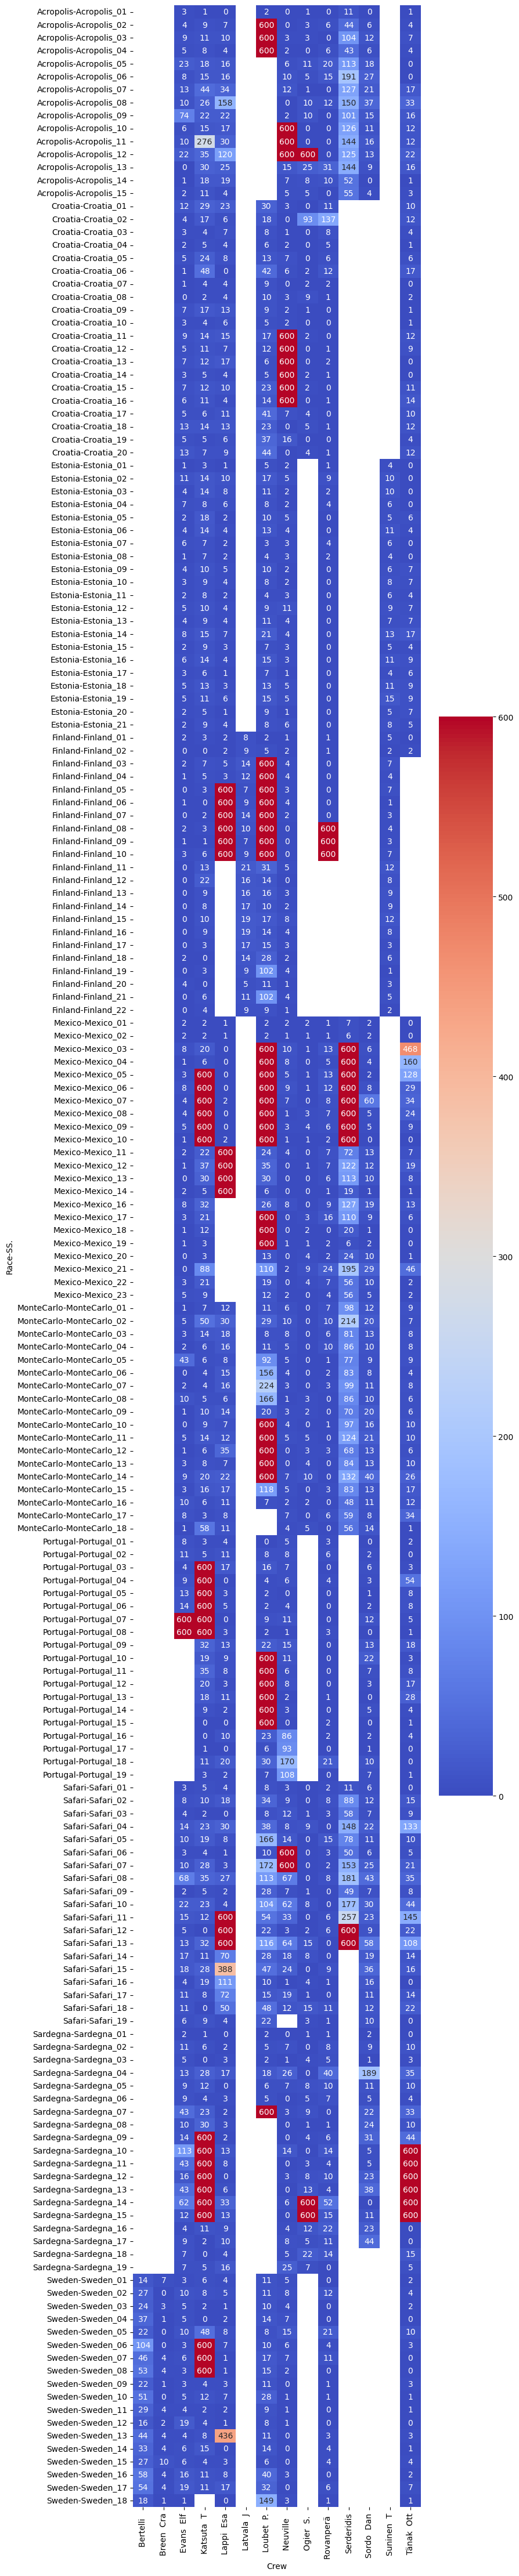

In [20]:
fig,ax = plt.subplots()
fig.set_size_inches(8,56)
#ax.set(xlabel='Time', ylabel='Value')
#ax.xaxis.label.set(fontsize=20, position=(0.9, 0))
#ax.yaxis.label.set(fontsize=15, position=(0, 0.9))
Heatmap_ALL = sns.heatmap(total_ss_times_F4, annot=True, fmt=',.0f', cmap='coolwarm')
#Heatmap_ALL.set_yticklabels(total_ss_times_WRC['Crew'], size = 15)
plt.savefig("Rc1.jpg")
plt.show()

In [16]:
total_ss_times_F5 = pd.pivot_table(total_ss_times_WRC, values='diff%', 
                                columns=['Race', 'SS.'], 
                                index='Crew', dropna=True)
total_ss_times_F5

Race          Acropolis                                                      \
SS.        Acropolis_01 Acropolis_02 Acropolis_03 Acropolis_04 Acropolis_05   
Crew                                                                          
Bertelli            NaN          NaN          NaN          NaN          NaN   
Breen  Cra          NaN          NaN          NaN          NaN          NaN   
Evans  Elf     3.013994     1.255981     1.329787     1.595905     2.928599   
Katsuta  T     1.399354     2.751196     1.669622     2.559470     2.306596   
Lappi  Esa     0.322928     2.033493     1.536643     1.144234     2.086303   
Latvala  J          NaN          NaN          NaN          NaN          NaN   
Loubet  P.     1.829925   179.425837    88.652482   180.668473          NaN   
Neuville       0.430571     0.000000     0.458038     0.662451     0.764546   
Ogier  S.      1.399354     1.016746     0.502364     0.000000     1.412466   
Rovanperä      0.000000     1.644737     0.000000     1.806685     2.617598   
Serderidis    11.410118    13.187799    15.351655    13.068353    14.668913   
Sordo  Dan     0.538213     1.913876     1.817376     1.806685     2.280679   
Suninen  T          NaN          NaN          NaN          NaN          NaN   
Tänak  Ott     0.753498     1.166268     1.063830     1.144234     0.000000   

Race                                                                         \
SS.        Acropolis_06 Acropolis_07 Acropolis_08 Acropolis_09 Acropolis_10   
Crew                                                                          
Bertelli            NaN          NaN          NaN          NaN          NaN   
Breen  Cra          NaN          NaN          NaN          NaN          NaN   
Evans  Elf     0.758276     1.070375     1.009309    11.395923     0.566449   
Katsuta  T     1.359349     3.699958     2.528172     3.350834     1.333333   
Lappi  Esa     1.461069     2.873999    15.433611     3.412600     1.490196   
Latvala  J          NaN          NaN          NaN          NaN          NaN   
Loubet  P.          NaN          NaN          NaN          NaN          NaN   
Neuville       0.878491     1.002950     0.000000     0.231624    52.287582   
Ogier  S.      0.453116     0.109566     0.960314     1.605930     0.017429   
Rovanperä      1.377844     0.000000     1.136698     0.000000     0.000000   
Serderidis    17.625301    10.703751    14.708476    15.657813    10.980392   
Sordo  Dan     2.487516     1.761483     3.606075     2.331686     0.984749   
Suninen  T          NaN          NaN          NaN          NaN          NaN   
Tänak  Ott     0.000000     1.449642     3.243508     2.393453     1.071895   

Race        ...    Sweden                                                     \
SS.         ... Sweden_09 Sweden_10 Sweden_11 Sweden_12  Sweden_13 Sweden_14   
Crew        ...                                                                
Bertelli    ...  6.870706  6.958305  5.972906  5.006180   6.054795  6.675967   
Breen  Cra  ...  0.437227  0.000000  0.841544  0.463535   0.561644  0.717417   
Evans  Elf  ...  0.905684  0.656186  0.800493  5.995056   0.616438  1.115982   
Katsuta  T  ...  1.405372  1.585783  0.513136  1.297899   1.123288  3.009167   
Lappi  Esa  ...  0.936914  0.915926  0.328407  0.309023  59.739726  0.039857   
Latvala  J  ...       NaN       NaN       NaN       NaN        NaN       NaN   
Loubet  P.  ...  3.497814  3.786740  1.929392  2.533993   1.547945  2.789956   
Neuville    ...  0.000000  0.136705  0.266831  0.309023   0.000000  0.000000   
Ogier  S.   ...       NaN       NaN       NaN       NaN        NaN       NaN   
Rovanperä   ...  0.343535  0.109364  0.000000  0.000000   0.465753  0.737346   
Serderidis  ...       NaN       NaN       NaN       NaN        NaN       NaN   
Sordo  Dan  ...       NaN       NaN       NaN       NaN        NaN       NaN   
Suninen  T  ...       NaN       NaN       NaN       NaN        NaN       NaN   
Tänak  Ott  ...  1.061836  0.150

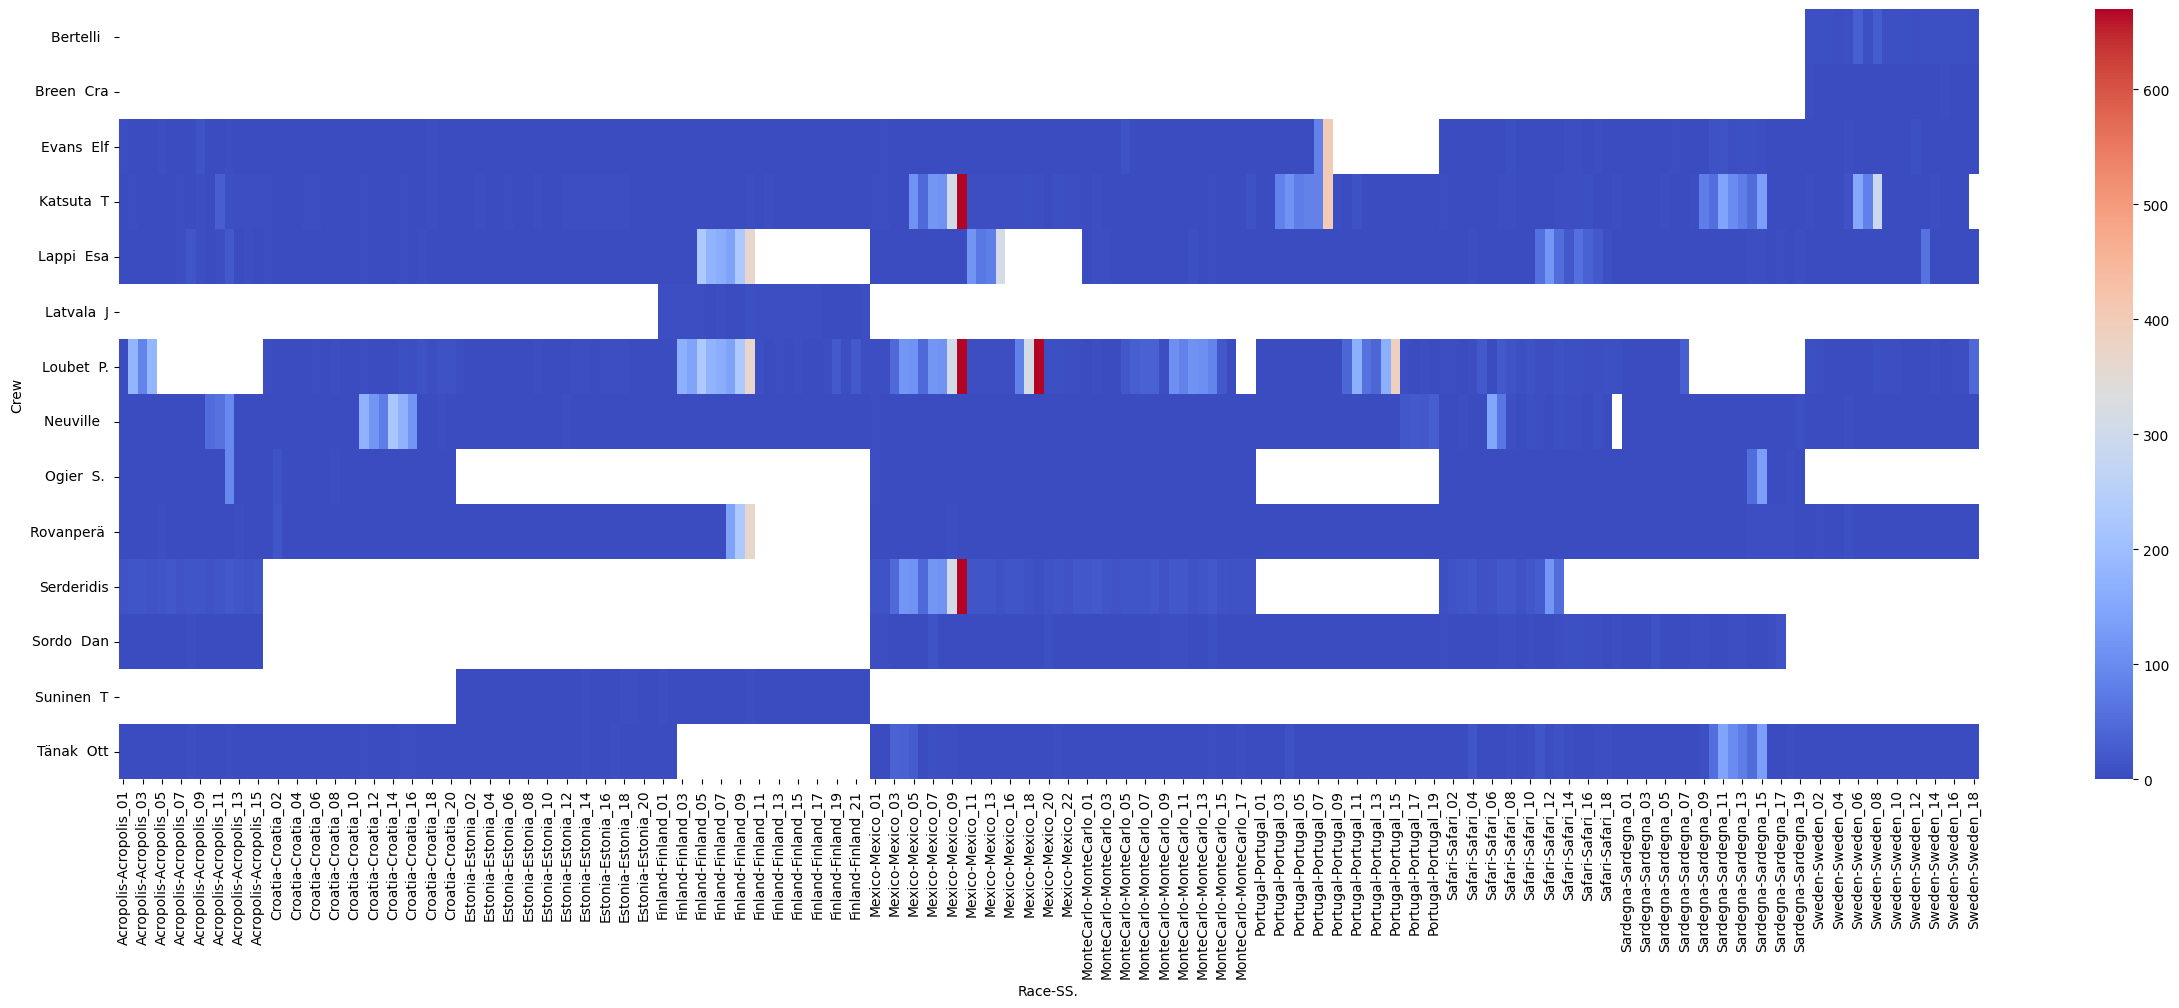

In [19]:
fig,ax = plt.subplots()
fig.set_size_inches(30,10)
#ax.set(xlabel='Time', ylabel='Value')
#ax.xaxis.label.set(fontsize=20, position=(0.9, 0))
#ax.yaxis.label.set(fontsize=15, position=(0, 0.9))
Heatmap_ALL = sns.heatmap(total_ss_times_F5, cmap='coolwarm')
#Heatmap_ALL.set_yticklabels(total_ss_times_WRC['Crew'], size = 15)
#plt.savefig("Rc2.jpg")
plt.show()